# MACHINE LEARNING
**Lab-10 : SVM**

---
*IDE: Colaboratory / Google Colab*

*Nguyen Duy Thanh - MSSV:18110013*

*email: duythanh.ndt273@gmail.com or 18110013@stduent.hcmus.edu.vn*

In [13]:
from google.colab import drive
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.svm import SVC,LinearSVC

In [14]:
def display_data_and_boundary(x,y,pred_fn):  
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    k = int(max(y)) + 1
    cols = ['ro', 'k^', 'b*','gx']
    for label in range(k):
        plt.plot(x[(y==label),0], x[(y==label),1], cols[label%4], markersize=8)
        
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([pred_fn(pt) for pt in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel1, vmin=0, vmax=k)
    plt.show()

## Câu 1 : Thử chạy SVM trên 2 files data_3.txt và data_4.txt với C=[0.1, 1.0, 10.0, 100.0]


In [15]:
#Tải File
!wget https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-10/data_3.txt #tải file data_3
!wget https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-10/data_4.txt #tải file data_4

--2021-07-08 09:01:42--  https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-10/data_3.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 345 [text/plain]
Saving to: ‘data_3.txt.2’

data_3.txt.2        100%[===================>]     345  --.-KB/s    in 0s      

2021-07-08 09:01:42 (13.3 MB/s) - ‘data_3.txt.2’ saved [345/345]

--2021-07-08 09:01:42--  https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-10/data_4.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 399 [text/plain]
Saving to: ‘data_4.txt.2’

data_

In [16]:
def run_svm(datafile,C_value):
    data = np.loadtxt(datafile)

    # Tạo training set x và label y
    x = data[:,0:2]
    y = data[:,2]

    k = int(max(y)) + 1
    print("Number of classes: ", k)

    # Train an SVM
    #clf = LinearSVC(loss='hinge', multi_class='crammer_singer', C=C_value)
    #clf.fit(x,y)
    # Show the data and boundary
    #pred_fn = lambda p: clf.predict(p.reshape(1,-1))    
    #display_data_and_boundary(x,y,pred_fn)

    # Train SVM với kernel linear
    clf = SVC(C = C_value,kernel="linear")
    clf.fit(x,y)
    plt.title("SVM với Kernel linear")
    pred_fn = lambda p: clf.predict(p.reshape(1,-1))
    display_data_and_boundary(x,y,pred_fn)

    #Sử dụng kernel rbf với gamma lớn, ta có thể thấy các miền quyết định gần như fit vào các điểm dữ liệu
    clf = svm.SVC(C = C_value, kernel="rbf",gamma=100)
    clf.fit(x,y)
    plt.title("Sử dụng Kernel rbf với gamma lớn")
    pred_fn = lambda p: clf.predict(p.reshape(1,-1))
    display_data_and_boundary(x,y,pred_fn)

    #Sử dụng kernel rbf, với gamma nhỏ ta thấy miền quyết định rộng hơn
    clf = svm.SVC(C = C_value, kernel="rbf",gamma=0.5)
    clf.fit(x,y)
    plt.title("Sử dụng Kernel rbf với gamma nhỏ")
    pred_fn = lambda p: clf.predict(p.reshape(1,-1))
    display_data_and_boundary(x,y,pred_fn)

### Với $ C = 0.1$ :

Number of classes:  4


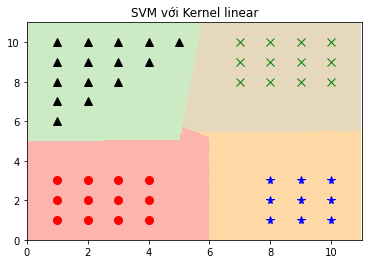

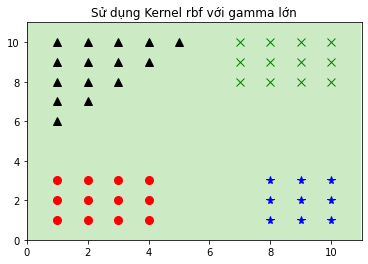

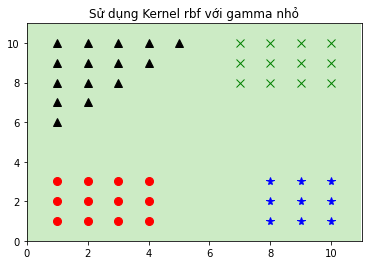

In [17]:
# Ta sử dụng file data_3
run_svm('data_3.txt',0.1)

Number of classes:  3


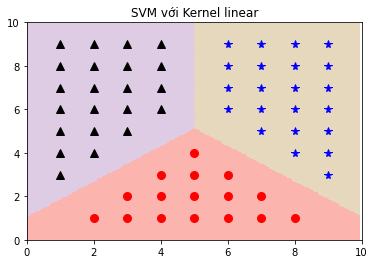

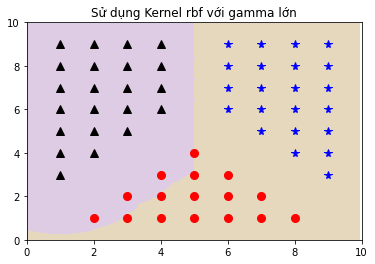

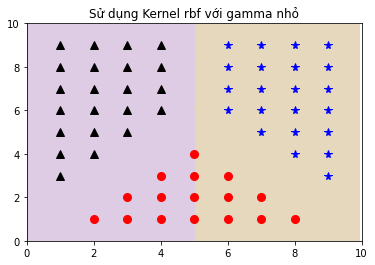

In [18]:
# Ta sử dụng file data_4
run_svm('data_4.txt',0.1)

### Với $ C = 1.0$ :


Number of classes:  4


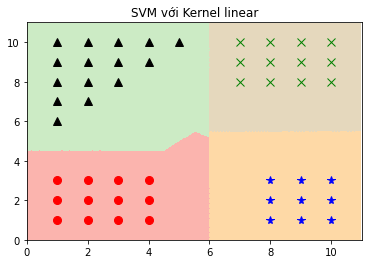

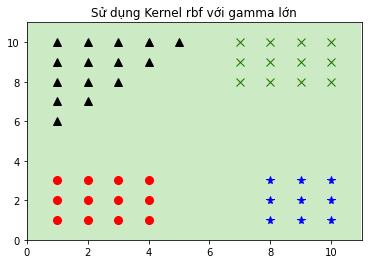

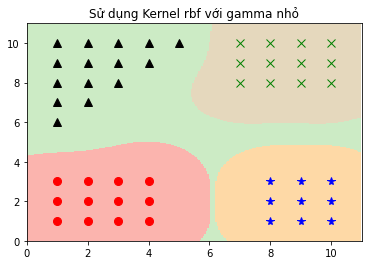

In [19]:
# Ta sử dụng file data_3
run_svm('data_3.txt',1.0)

Number of classes:  3


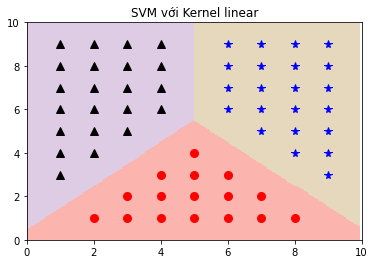

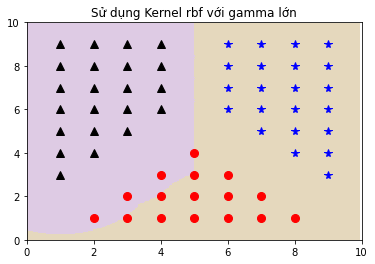

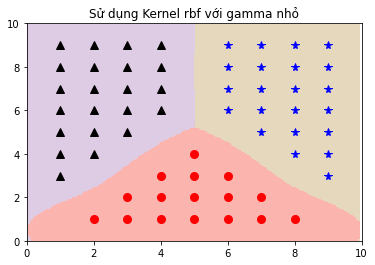

In [20]:
# Ta sử dụng file data_4
run_svm('data_4.txt',1.0)

### Với $C = 10.0$ :

Number of classes:  4


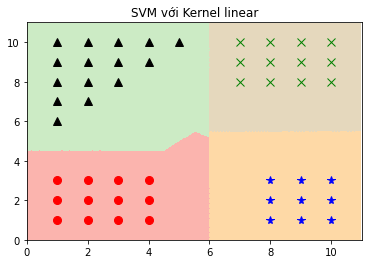

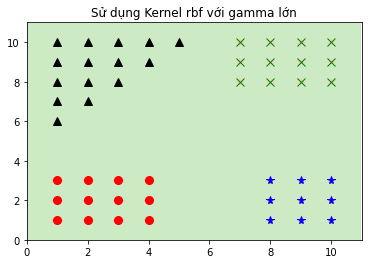

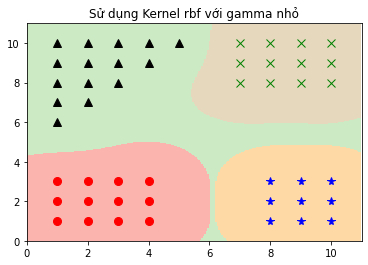

In [21]:
# Ta sử dụng file data_3
run_svm('data_3.txt',10.0)

Number of classes:  3


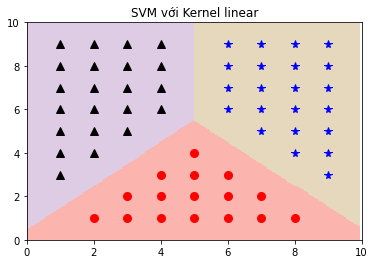

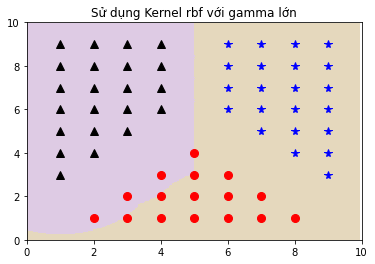

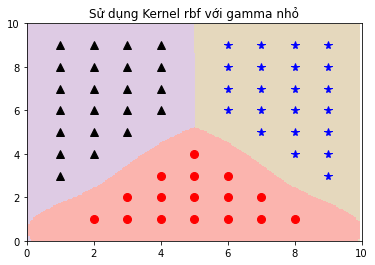

In [22]:
# Ta sử dụng file data_4
run_svm('data_4.txt',10.0)

### Với $ C = 100.0$ :

Number of classes:  4


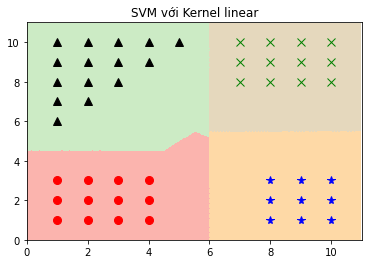

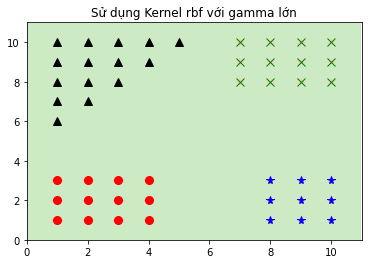

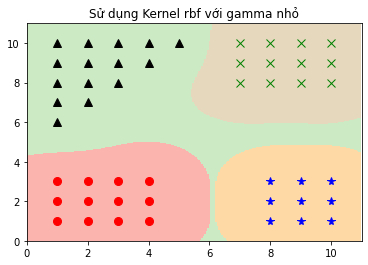

In [23]:
# Ta sử dụng file data_3
run_svm('data_3.txt',100.0)

Number of classes:  3


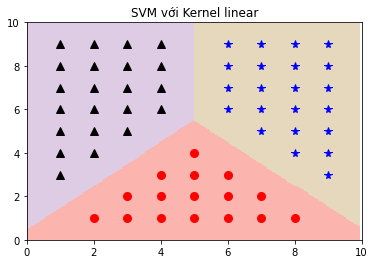

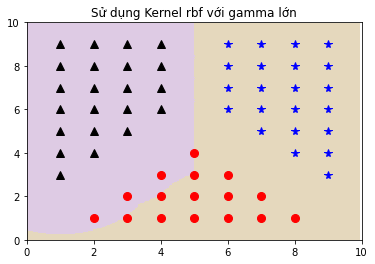

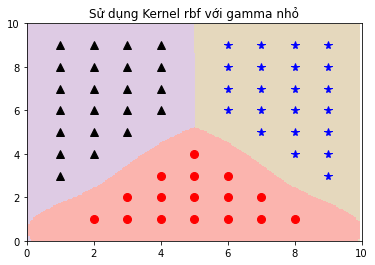

In [24]:
# Ta sử dụng file data_4
run_svm('data_4.txt',100.0)

## Câu 2 : Nhận xét với từng $C$ khác nhau thì mô hình thay đổi như thế nào

Nếu C nhỏ, hình phạt cho các điểm phân loại sai sẽ thấp, do đó, một ranh giới quyết định có biên độ lớn được chọn với chi phí là số lượng phân loại sai nhiều hơn.

Nếu C lớn, SVM cố gắng giảm thiểu số lượng các ví dụ được phân loại sai do mức phạt cao dẫn đến ranh giới quyết định với biên độ nhỏ hơn. Hình phạt không giống nhau đối với tất cả các ví dụ bị phân loại sai. Nó tỷ lệ thuận với khoảng cách đến ranh giới quyết định.

Khi chúng ta tăng giá trị C, lợi nhuận sẽ nhỏ hơn. Do đó, các mô hình có giá trị C thấp có xu hướng tổng quát hơn. Sự khác biệt trở nên rõ ràng hơn với bộ dữ liệu lớn hơn.




## Câu 3 : Nêu lợi và hại khi tăng $\gamma (gamma)$ và giảm $\gamma (gamma)$

Gamma là một siêu thông số được sử dụng với SVM phi tuyến tính. Một trong những nhân phi tuyến tính được sử dụng phổ biến nhất là hàm cơ sở xuyên tâm (RBF). Tham số gamma của RBF kiểm soát khoảng cách ảnh hưởng của một điểm đào tạo duy nhất.


*  Giá trị thấp của gamma cho thấy bán kính tương tự lớn dẫn đến nhiều điểm được nhóm lại với nhau. 
*  Đối với các giá trị cao của gamma, các điểm cần phải rất gần nhau để được xem xét trong cùng một nhóm (hoặc lớp). 


Do đó, các mô hình có giá trị gamma rất lớn có xu hướng quá mức.

Khi giá trị gamma tăng lên, mô hình đang trở nên quá mức. Các điểm dữ liệu cần phải rất gần nhau để được nhóm lại với nhau vì bán kính tương tự giảm khi giá trị gamma tăng lên.

**Nhận Xét :**

Đối với nhân tuyến tính, chúng ta chỉ cần tối ưu hóa tham số C. Tuy nhiên, nếu chúng ta muốn sử dụng nhân RBF, cả hai tham số C và gamma cần được tối ưu hóa đồng thời. Nếu gamma lớn, ảnh hưởng của C trở nên không đáng kể. Nếu gamma nhỏ, C ảnh hưởng đến mô hình giống như cách nó ảnh hưởng đến mô hình tuyến tính. Các giá trị điển hình cho C và gamma như sau. Tuy nhiên, các giá trị tối ưu cụ thể có thể tồn tại tùy thuộc vào ứng dụng:

$$0,0001 <gamma <10$$
$$0,1 <c <100$$